<a href="https://colab.research.google.com/github/jcrpanta/Metodos_Numericos_2023-1/blob/main/1_1_Bisecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Bisección

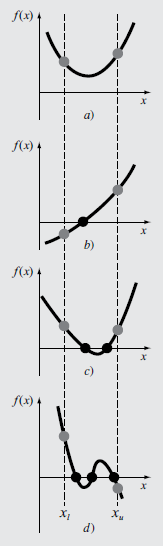

Sea $f=f(x)$ una función continua de variable real. Entonces:

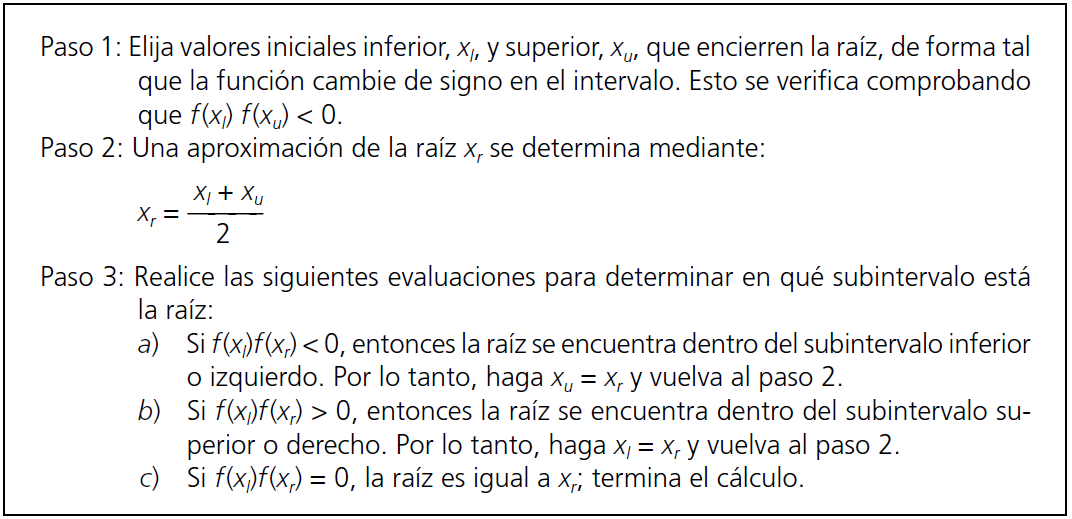

**Nota.** De ser posible, primero graficamos.

## Código_Gráfica

In [ ]:
from sympy import symbols
from sympy.plotting import plot

def graficar_funcion(funcion, aa, bb):
    if aa - bb >= 0:
        return "Debe ser a < b"
    xx = symbols('x')
    p1 = plot(funcion, (xx, aa, bb))

## Gráfica

(Para graficar, primero ejecutamos la celda de la sección "Código_Gráfica")

**Paso 1.** Escribir entre comillas (" ") la función $f=f(x)$ a graficar:


In [ ]:
funcion = "668.06 / x * (1 - exp(-0.14684*x)) - 40"

**Paso 2.** Ingresar los extremos del intervalo $[a,b]$ en el que se graficará la función $f$:

In [ ]:
aa = 12
bb = 16

**Paso 3.** Ejecutar la función `graficar_funcion`:

In [ ]:
graficar_funcion(funcion, aa, bb)

## Criterio de Paro (Tolerancia)

(Scarborough, 1966) Si el siguiente criterio se cumple, se tendrá la seguridad que el resultado es correcto en al menos $k$ cifras significativas:

$$\varepsilon_s = (0.5 \times 10^{2-k})\%$$

Donde, $\varepsilon_s$ es una tolerancia porcentual prefijada. ¡Pero esto sólo nos da un número específico de *cifras significativas*! Y no el número de iteraciones (mínimamente necesarias) para tener un error por debajo de $\varepsilon_s$.

**Criterio 1.** En cada iteración el error relativo (aproximado) $\varepsilon_{r_{aprox}}$ se puede calcular, utilizando los valores *actualizados* de $x_{l}$ y $x_{u}$, con la siguiente fórmula:

$$ \varepsilon_{r_{aprox}} = \left| \frac{x_{u} - x_{l}}{x_{u} + x_{l}} \right|, \quad 
\varepsilon_{r_{aprox\%}} = \left| \frac{x_{u} - x_{l}}{x_{u} + x_{l}} \right| \cdot 100 \%$$

**Criterio 2.** Si queremos que una raíz aproximada en el intervalo $[x_{l},x_{u}]$ esté dentro de una tolerancia de $\varepsilon_s \approx 0$ (en valor decimal), entonces el *número de iteraciones necesarias* se puede calcular con la siguiente fórmula:

$$\frac{\ln|(x_{u}-x_{l}) / \varepsilon_s|}{\ln|2|}$$

**Nota**. Aunque se ha puesto énfasis en el uso del error relativo, habrá casos (usualmente a través del conocimiento del contexto del problema) donde se podrá especificar el error absoluto. En esos casos, la bisección junto con la fórmula anterior ofrece un útil algoritmo de localización de raíces.

## Código_Bisección (Base: Error Relativo)

In [ ]:
import sympy as sym

In [ ]:
def biseccion(funcion, xl, xu, Es):
    if xl - xu >= 0:
        return "Debe ser xl < xu"

    xx = sym.symbols("x")
    funcion = sym.sympify(funcion)
    ff = sym.lambdify(xx, funcion)

    if ff(xl) * ff(xu) > 0:
        return print("No se puede iniciar el método: f(xl)*f(xu) > 0")

    if ff(xl) == 0.0:
        return print(f"El valor xl = {xl} es una raíz")

    if ff(xu) == 0.0:
        return print(f"El valor xu = {xu} es una raíz")

    iter = 1
    Eraprox = 100
    while Eraprox >= (Es/100):
        xr = (xl + xu) / 2

        if xl + xu == 0:
            Eraprox = abs(xu - xl)
        else:
            Eraprox = abs((xu - xl) / (xu + xl))    
        
        if ff(xr) == 0:
            return print(f"El valor (aproximado) de la raíz es: {xr}")

        if ff(xl) * ff(xr) < 0:
            xu = xr
        else:
            xl = xr
  
        print(f"Iteración {iter}: xr = {xr}, Era% = {Eraprox * 100} %")
        iter = iter + 1      

    return print(f"\nEl valor de la raíz es: {xr}")

## Bisección

(Primero ejecutamos la celda de la sección "Código_Bisección")

In [ ]:
funcion = "668.06 / x * (1 - exp(-0.14684*x)) - 40"
xl = 12
xu = 16
Es = 1 # En porcentaje

In [ ]:
biseccion(funcion, xl, xu, Es)